In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

# Reading CSV file.
file_path ="C:/Users/saife/Desktop/abc.csv"
newfile=pd.read_csv(file_path, encoding='unicode_escape')
newfile.head()

,Ranking,Artist,Song Title,Year,Group / Solos
0,1,Percy Faith,Theme From A Summer Place,1960,Solo
1,2,Jim Reeves,Hell Have To Go,1960,Solo
2,3,Everly Brothers,Cathys Clown,1960,Group
3,4,Johnny Preston,Running Bear,1960,Solo
4,5,Mark Dinning,Teen Angel,1960,Solo


In [2]:
# Count Summary to give the total Solo hits and total Group hits (1960 -2017).
count_summary=newfile["Group / Solos"].value_counts()
count_summary

Solo     338
Group    242
Name: Group / Solos, dtype: int64

Solo Count :338
Group Count:242
Total Count :580
58.27586206896552
41.724137931034484


<function matplotlib.pyplot.show>

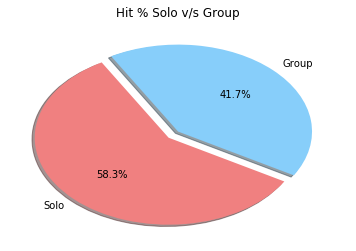

In [3]:
# creating seperate variables to get the count and %.
newfile["Group / Solos"].nunique()
solo= newfile.loc[newfile["Group / Solos"]=="Solo"]
solo_tcount=len(solo)
print("Solo Count :" + str(solo_tcount))
group= newfile.loc[newfile["Group / Solos"]=="Group"]
group_tcount=len(group)
print("Group Count:" + str(group_tcount))
total_count =solo_tcount + group_tcount
print("Total Count :" + str(total_count))
per_solo = solo_tcount/total_count * 100
print(per_solo)
per_group=group_tcount/total_count * 100
print(per_group)
new = pd.DataFrame

# creating a pie chart, usinf the variables created earlier.
labels = ["Solo", "Group"]
sizes = [per_solo, per_group]
colors =["lightcoral", "lightskyblue"]
explode = [0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors= colors, autopct="%1.1f%%", shadow= True, startangle =120)
plt.title("Hit % Solo v/s Group")
plt.show



In [4]:
# Further analysis of data to show decadewise trend.
bins = [1959, 1969, 1979, 1989, 1999, 2009, 2018]
group_names = [1960, 1970, 1980, 1990, 2000,2010]

In [5]:
# Performing some functions to know data better.
newfile.dtypes
newfile["Year"] = pd.to_numeric(newfile["Year"])
newfile.head()


,Ranking,Artist,Song Title,Year,Group / Solos
0,1,Percy Faith,Theme From A Summer Place,1960,Solo
1,2,Jim Reeves,Hell Have To Go,1960,Solo
2,3,Everly Brothers,Cathys Clown,1960,Group
3,4,Johnny Preston,Running Bear,1960,Solo
4,5,Mark Dinning,Teen Angel,1960,Solo


In [6]:
newfile["year_view"] = pd.cut(newfile["Year"], bins, labels=group_names)
newfile["year_view"].count()

# newfile.dtypes
# newfile["year_view"]= pd.to_numeric(newfile["year_view"])
# newfile.dtypes


580

In [7]:
# # Grouping data year wise and further bifurcation on Solos and Group.
# grp_data= newfile.groupby(["year_view","Group / Solos"])

# year_list = []
# year_list = newfile["year_view"].unique()
# print(year_list)

# grp_count = [grp_data.get_group(year)["Group"].size for year in year_list]
# print(grp_count)
# # xa=grp_data["year_view"]
# # ya=grp_data["Ranking"]


[1960, 1970, 1980, 1990, 2000, 2010]
Categories (6, object): [1960 < 1970 < 1980 < 1990 < 2000 < 2010]
[55, 43, 49, 44, 28, 23]
[45, 57, 51, 56, 72, 57]


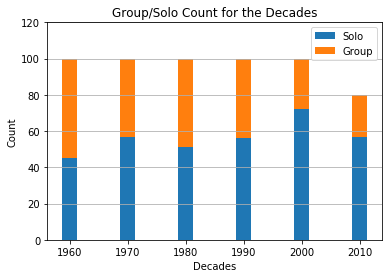

In [33]:
# Grouping data year wise and further bifurcation on Solos and Group.
year_view_grp_data= newfile.groupby(["year_view"])

year_list = []
grp_count = []
solo_count = []
year_list = newfile["year_view"].unique()
print(year_list)

#grp_count = [grp_data.get_group(year).groupby["Group / Solos"].get_group("Solo").size() for year in year_list]
#print(grp_data.get_group(2000).groupby["Group / Solos"].get_group("Solo").size())
# xa=grp_data["year_view"]
# ya=grp_data["Ranking"]

for year in year_list:
    working_df = year_view_grp_data.get_group(year)
    working_df = working_df.groupby("Group / Solos")
    grp_count.append(len(working_df.get_group("Group")["Year"]))
    solo_count.append(len(working_df.get_group("Solo")["Year"]))
    
print(grp_count)
print(solo_count)

width = [0.25]

fig1 = plt.bar(year_list, solo_count, width)
fig2 = plt.bar(year_list,grp_count, width, bottom=solo_count)
plt.xticks(year_list, year_list)
plt.title("Group/Solo Count for the Decades")
plt.legend( (fig1[0], fig2[0]), ('Solo', 'Group') )
plt.xlabel("Decades")
plt.ylabel("Count")
plt.grid(axis = 'y')
plt.ylim(0,120)
plt.show()
    
